In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare(name: str):
    def parse(_name: str):
        with open(_name, 'r') as f:
            ln = f.readlines()
            
        d = {}
        for line in ln:
            idx = line.index('#')
            key = line[:idx]
            val = float(line[idx+1:])
            
            d[key] = val
        
        return d
    
    print(name)
    before_name = 'before-' + name
    after_name = 'after-' + name
    
    d_before = parse(before_name)
    d_after = parse(after_name)
    diff = []
    
    for key in d_before:
        assert key in d_after
        
        tb = d_before[key]
        ta = d_after[key]
        
        diff.append(ta/tb)
        
        if ta / tb > 1.1:
            print(f'(*shape, k, dim)={key.rstrip()},  time after ={ta : .3e} ms,  '
                  f'time before ={tb : .3e} ms,  '
                  f'slow down{ta/tb : .3e}')
    
    ax = sns.distplot(diff, bins=40)
    ax.set(xlabel='time after / time before (smaller is better)', ylabel='PDF', xlim=(0, 1.5))
    plt.show()

cuda-torch.float32.txt


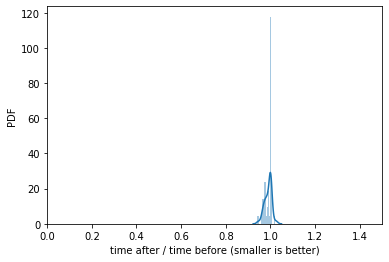

cuda-torch.float16.txt


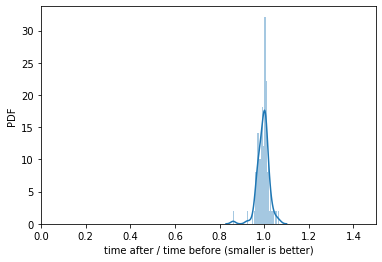

In [2]:
compare('cuda-torch.float32.txt')
compare('cuda-torch.float16.txt')